# Lugar geométrico das raízes - Sistemas de Controle

## Passo 1
- Escrever o polinômio na forma $1 + KP(s)$

## Root Locus - Verificação

In [17]:
using Pkg
Pkg.add("Plots")
Pkg.add("ControlSystems")
Pkg.add("SymPy")

using Plots
using ControlSystems
using SymPy

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed SymPy ───── v2.0.1
   Installed CommonEq ── v0.2.1
   Installed SymPyCore ─ v0.1.16
    Updating `~/.julia/environments/v1.10/Project.toml`
  [24249f21] + SymPy v2.0.1
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [3709ef60] + CommonEq v0.2.1
  [24249f21] + SymPy v2.0.1
  [458b697b] + SymPyCore v0.1.16
Precompiling project...
  ✓ CommonEq
  ✓ SymPyCore
  ✓ SymPy
  3 dependencies successfully precompiled in 5 seconds. 323 already precompiled.


In [2]:
# Define the numerator and denominator of the transfer function
num = [0, 1]  # Coefficients of s + 2
den = [1, 12, 64, 128, 0]  # Coefficients of s^2 + 2s + 3

# Create the transfer function model
sys = tf(num, den)


TransferFunction{Continuous, ControlSystemsBase.SisoRational{Int64}}
            1
--------------------------
s^4 + 12s^3 + 64s^2 + 128s

Continuous-time transfer function model

┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefo

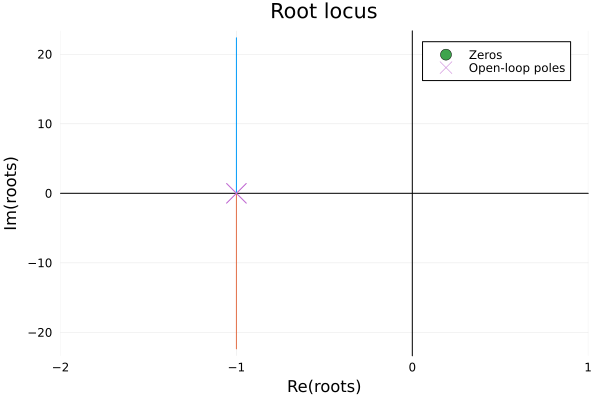

In [3]:
# Example: Define G(s) and H(s)
G = tf([1], [1, 2, 1])  # G(s) = 1 / (s^2 + 2s + 1)
H = tf([1], [1])        # H(s) = 1 (unity feedback)

# The open-loop transfer function G(s)H(s) without explicitly specifying k
GH = G * H

# Generate the root locus plot, which implicitly considers the variation of k
rlocusplot(GH)


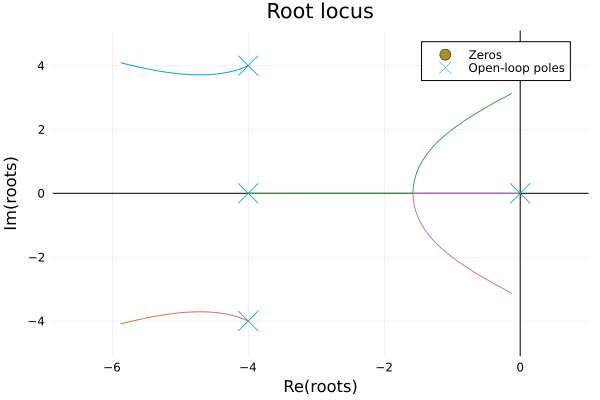

In [4]:

rlocusplot(sys)


# Passos do LGR

- Passar G(s) e H(s)

In [2]:
G = tf([0, 1], [1,6,8])  
H = tf([1, 1], [1,4,0])       

GH = G * H

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Int64}}
          s + 1
-------------------------
s^4 + 10s^3 + 32s^2 + 32s

Continuous-time transfer function model

## Polos e zeros

In [34]:
# Obtain the zeros of the system
zeros, poles, k = zpkdata(GH)
zeros = zeros[1]
poles = poles[1]

nz = length(zeros)
np = length(poles)

println("Zeros of the system: ", zeros)


Zeros of the system: ComplexF64[-1.0 + 0.0im]


In [35]:
println("Poles of the system: ", poles)

Poles of the system: ComplexF64[-4.000000114119472 + 0.0im, -3.9999998858805257 + 0.0im, -2.0000000000000027 + 0.0im, 0.0 + 0.0im]


## Sigma e phi

In [36]:
sigma = (sum(poles) - sum(zeros))/(length(poles) - length(zeros))

-3.0 + 0.0im

In [37]:
q_max = np - nz - 1
# Use a comprehension to calculate φ for each q
phis = [((2q + 1) * 180) / (np - nz) for q in 0:q_max]

3-element Vector{Float64}:
  60.0
 180.0
 300.0

## Passo da morte

In [61]:
num = numpoly(GH)[1].coeffs

2-element Vector{Int64}:
 1
 1

In [64]:
denpoly(GH)[1].coeffs

5-element Vector{Int64}:
  0
 32
 32
 10
  1

In [ ]:
using SymPy

@symbols s

# Convert to symbolic expressions
num_sym = sum([coeff * s^i for (i, coeff) in enumerate(reverse(num))]) - 1
den_sym = sum([coeff * s^i for (i, coeff) in enumerate(reverse(den))]) - 1

# Create the symbolic transfer function expression
G_sym = num_sym / den_sym

# Differentiate the symbolic transfer function
G_diff = diff(G_sym, s)